# **Diabetes DataSet All u need to know About it.**

1. **Dataset Structure**:
   - Contains 442 samples
   - 10 feature variables
   - 1 target variable (disease progression)

2. **Features Description**:
   - age: Age of the patient
   - sex: Gender information
   - bmi: Body Mass Index
   - bp: Blood Pressure
   - s1-s6: Six blood serum measurements

3. **Target Variable**:
   - Represents disease progression one year after baseline
   - Continuous value
   - Used for regression problems

4. **Key Statistics**:
   - No missing values in the dataset
   - All features are standardized (mean=0, std=1)
   - Target variable has a roughly normal distribution

5. **Feature Correlations**:
   - BMI typically shows strong correlation with disease progression
   - Blood pressure (bp) has moderate correlation
   - Some blood serum measurements show significant correlations

6. **Data Quality**:
   - Clean dataset with no missing values
   - No duplicate entries
   - Features are already preprocessed and standardized

7. **Distribution Characteristics**:
   - Most features follow approximately normal distributions
   - Some features show slight skewness
   - No significant outliers that would require removal



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import ( LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ( RandomForestRegressor, GradientBoostingRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
import joblib
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



# Create directories for saving models and plots
os.makedirs('saved_models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

In [ ]:

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target


X.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(diabetes.target, name='disease_progression')

# Combine features and target for complete analysis
df = pd.concat([df_X, df_y], axis=1)


In [ ]:
# 1. Basic Dataset Information
print("=== BASIC DATASET INFORMATION ===")
print("\nShape of dataset:", df.shape)
print("\nFeature names:", list(diabetes.feature_names))
print("\nDetailed Info:")
print(df.info())


# Check for null values
print("\nNull Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

=== BASIC DATASET INFORMATION ===

Shape of dataset: (442, 11)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Detailed Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

Null Values:
age                    0


In [ ]:

# 2. Statistical Description
print("\n=== STATISTICAL DESCRIPTION ===")
df.describe()



=== STATISTICAL DESCRIPTION ===


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:

# 3. Feature Correlations
correlations = df.corr()
print("\n=== CORRELATION WITH TARGET (Disease Progression) ===")
print(correlations['disease_progression'].sort_values(ascending=False))



=== CORRELATION WITH TARGET (Disease Progression) ===
disease_progression    1.000000
bmi                    0.586450
s5                     0.565883
bp                     0.441482
s4                     0.430453
s6                     0.382483
s1                     0.212022
age                    0.187889
s2                     0.174054
sex                    0.043062
s3                    -0.394789
Name: disease_progression, dtype: float64


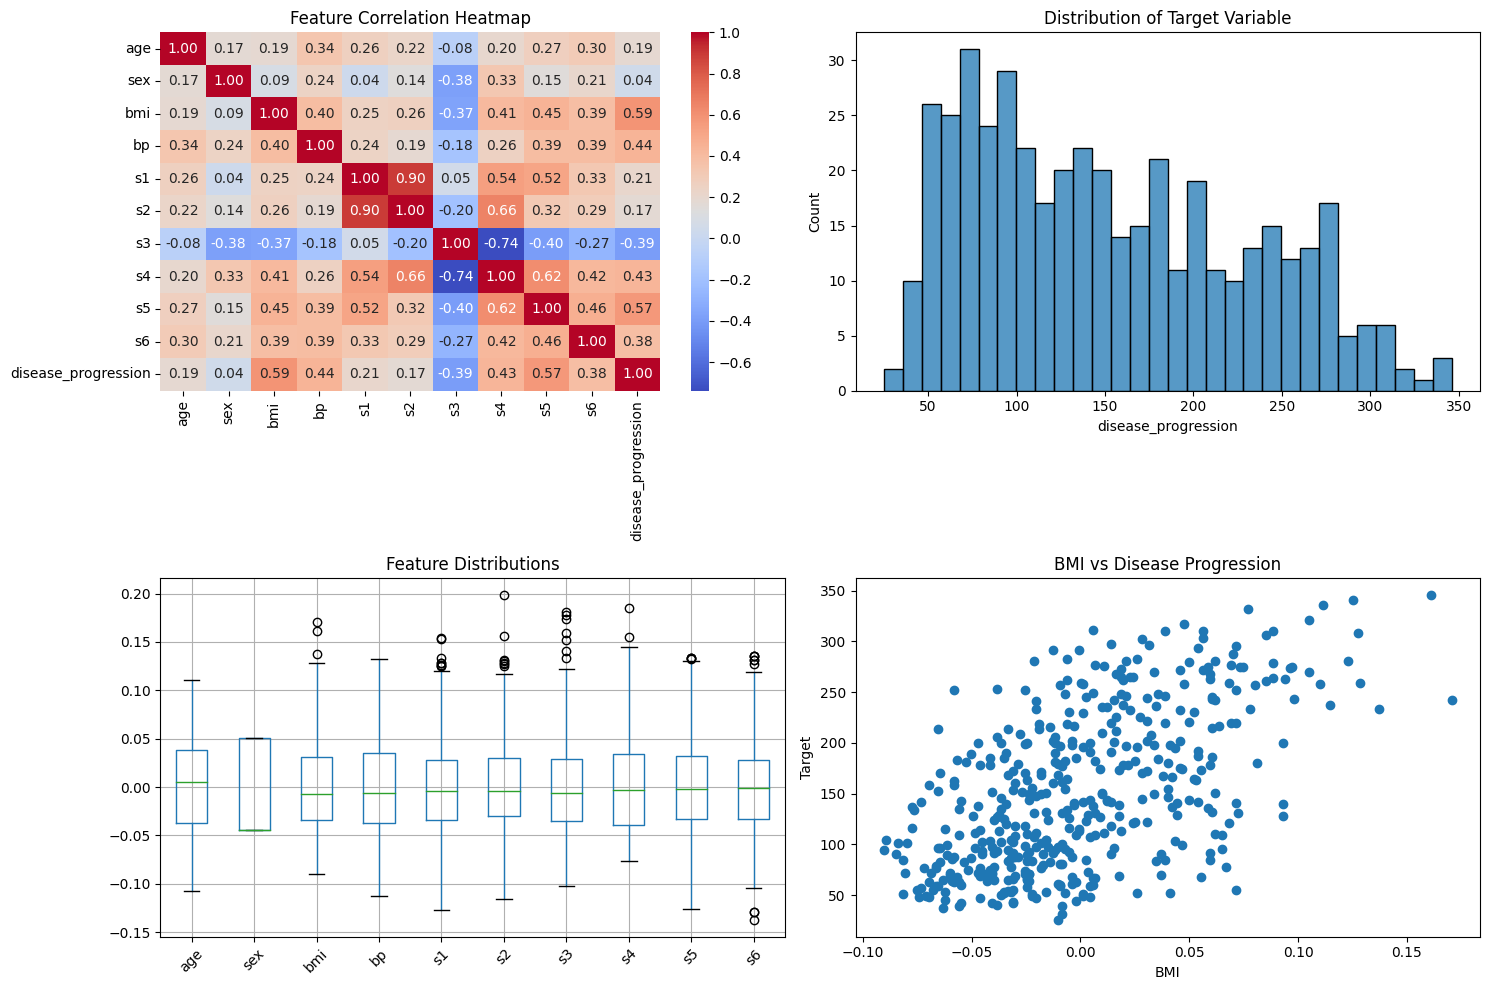

In [ ]:

# 4. Data Visualization
plt.figure(figsize=(15, 10))

# Correlation heatmap
plt.subplot(2, 2, 1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')

# Distribution of target variable
plt.subplot(2, 2, 2)
sns.histplot(df_y, bins=30)
plt.title('Distribution of Target Variable')

# Box plots for features
plt.subplot(2, 2, 3)
df_X.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Feature Distributions')

# Scatter plot of BMI vs Target
plt.subplot(2, 2, 4)
plt.scatter(df_X['bmi'], df_y)
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('BMI vs Disease Progression')

plt.tight_layout()
plt.show()


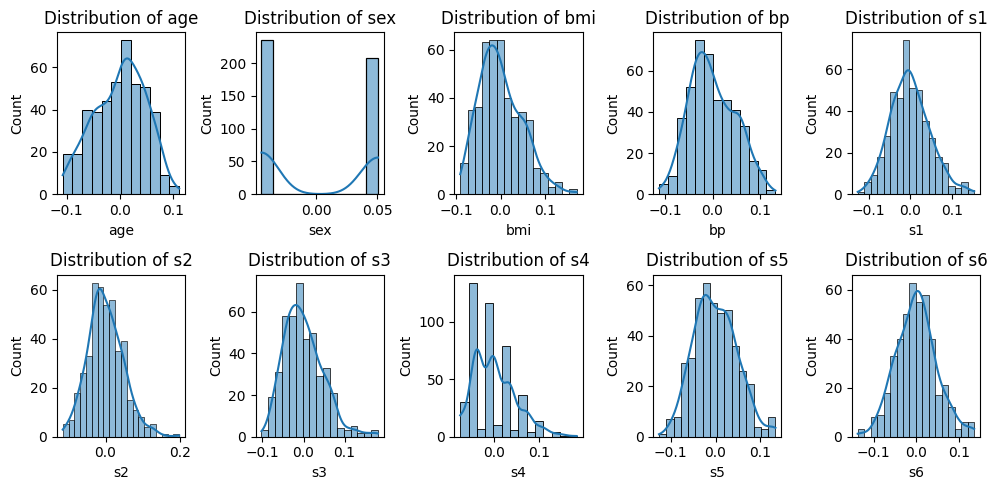

In [ ]:
# Visualization of Distributions
plt.figure(figsize=(10, 5))

# Distribution plots for each feature
for idx, feature in enumerate(diabetes.feature_names, 1):
    plt.subplot(2,5, idx)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:

# 5. Detailed Statistical Analysis
print("\n=== DETAILED STATISTICAL ANALYSIS ===")
analysis_data = []
for column in df.columns:
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()
    missing_values = df[column].isnull().sum()
    unique_values = df[column].nunique()
    top_5_values = df[column].value_counts().head().to_dict()

    analysis_data.append([column, skewness, kurtosis, missing_values, unique_values, top_5_values])

analysis_df = pd.DataFrame(analysis_data, columns=['Column', 'Skewness', 'Kurtosis', 'Missing Values', 'Unique Values', 'Top 5 Values'])
analysis_df


=== DETAILED STATISTICAL ANALYSIS ===


,Column,Skewness,Kurtosis,Missing Values,Unique Values,Top 5 Values
0,age,-0.231382,-0.671224,0,58,"{0.016280675727306498: 19, 0.04170844488444244..."
1,sex,0.127385,-1.992811,0,2,"{-0.044641636506989144: 235, 0.050680118739818..."
2,bmi,0.598148,0.095094,0,163,"{-0.02452875939178067: 8, -0.03099563183506548..."
3,bp,0.290658,-0.532797,0,100,"{-0.04009893205125: 21, -0.00567042229275739: ..."
4,s1,0.378108,0.232948,0,141,"{-0.007072771253015731: 10, -0.037343734133440..."
5,s2,0.436592,0.601381,0,302,"{-0.0010007289644291908: 5, 0.0162224364339952..."
6,s3,0.799255,0.981507,0,63,"{-0.01394774321932938: 22, -0.0434008456520249..."
7,s4,0.735374,0.444402,0,66,"{-0.03949338287409329: 128, -0.002592261998183..."
8,s5,0.291754,-0.134367,0,184,"{-0.018113692315690322: 11, -0.030747917533098..."
9,s6,0.207917,0.236917,0,56,"{0.0030644094143684884: 22, 0.0196328370737063..."


In [ ]:
# 6. Summary of Key Findings
print("\n=== SUMMARY OF KEY FINDINGS ===")
print("\n1. Dataset Dimensions:")
print(f"- Number of samples: {df.shape[0]}")
print(f"- Number of features: {df.shape[1] - 1}")  # excluding target
print(f"- Total number of data points: {df.shape[0] * df.shape[1]}")

print("\n2. Target Variable (Disease Progression):")
print(f"- Mean: {df_y.mean():.2f}")
print(f"- Median: {df_y.median():.2f}")
print(f"- Standard Deviation: {df_y.std():.2f}")
print(f"- Range: {df_y.min():.2f} to {df_y.max():.2f}")

print("\n3. Top 4 Correlated Features with Disease Progression:")
top_correlations = correlations['disease_progression'].sort_values(ascending=False)[1:5]
for feature, corr in top_correlations.items():
    print(f"- {feature}: {corr:.3f}")

print("\n4. Data Quality:")
print("- Missing values:", df.isnull().sum().sum())
print("- Duplicated rows:", df.duplicated().sum())


=== SUMMARY OF KEY FINDINGS ===

1. Dataset Dimensions:
- Number of samples: 442
- Number of features: 10
- Total number of data points: 4862

2. Target Variable (Disease Progression):
- Mean: 152.13
- Median: 140.50
- Standard Deviation: 77.09
- Range: 25.00 to 346.00

3. Top 4 Correlated Features with Disease Progression:
- bmi: 0.586
- s5: 0.566
- bp: 0.441
- s4: 0.430

4. Data Quality:
- Missing values: 0
- Duplicated rows: 0


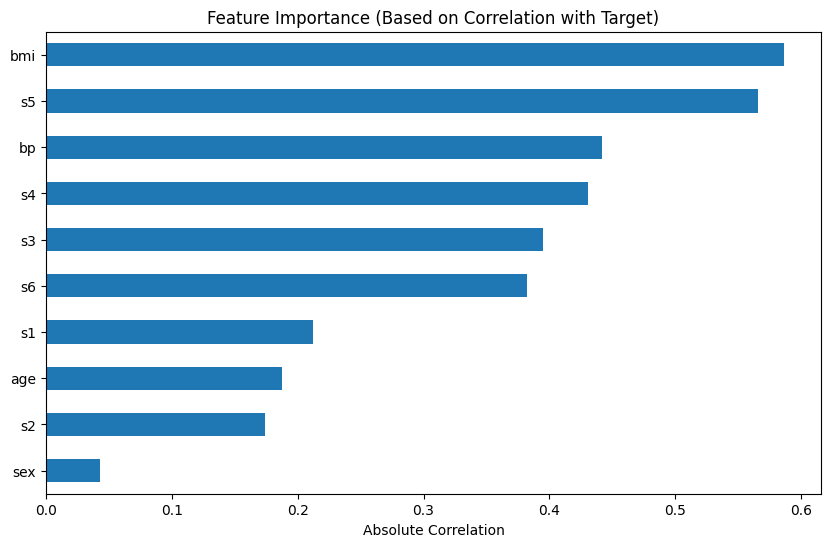

In [ ]:
# 7. Feature Importance (based on correlation with target)
plt.figure(figsize=(10, 6))
feature_importance = abs(correlations['disease_progression']).sort_values(ascending=True)
feature_importance[:-1].plot(kind='barh')
plt.title('Feature Importance (Based on Correlation with Target)')
plt.xlabel('Absolute Correlation')
plt.show()

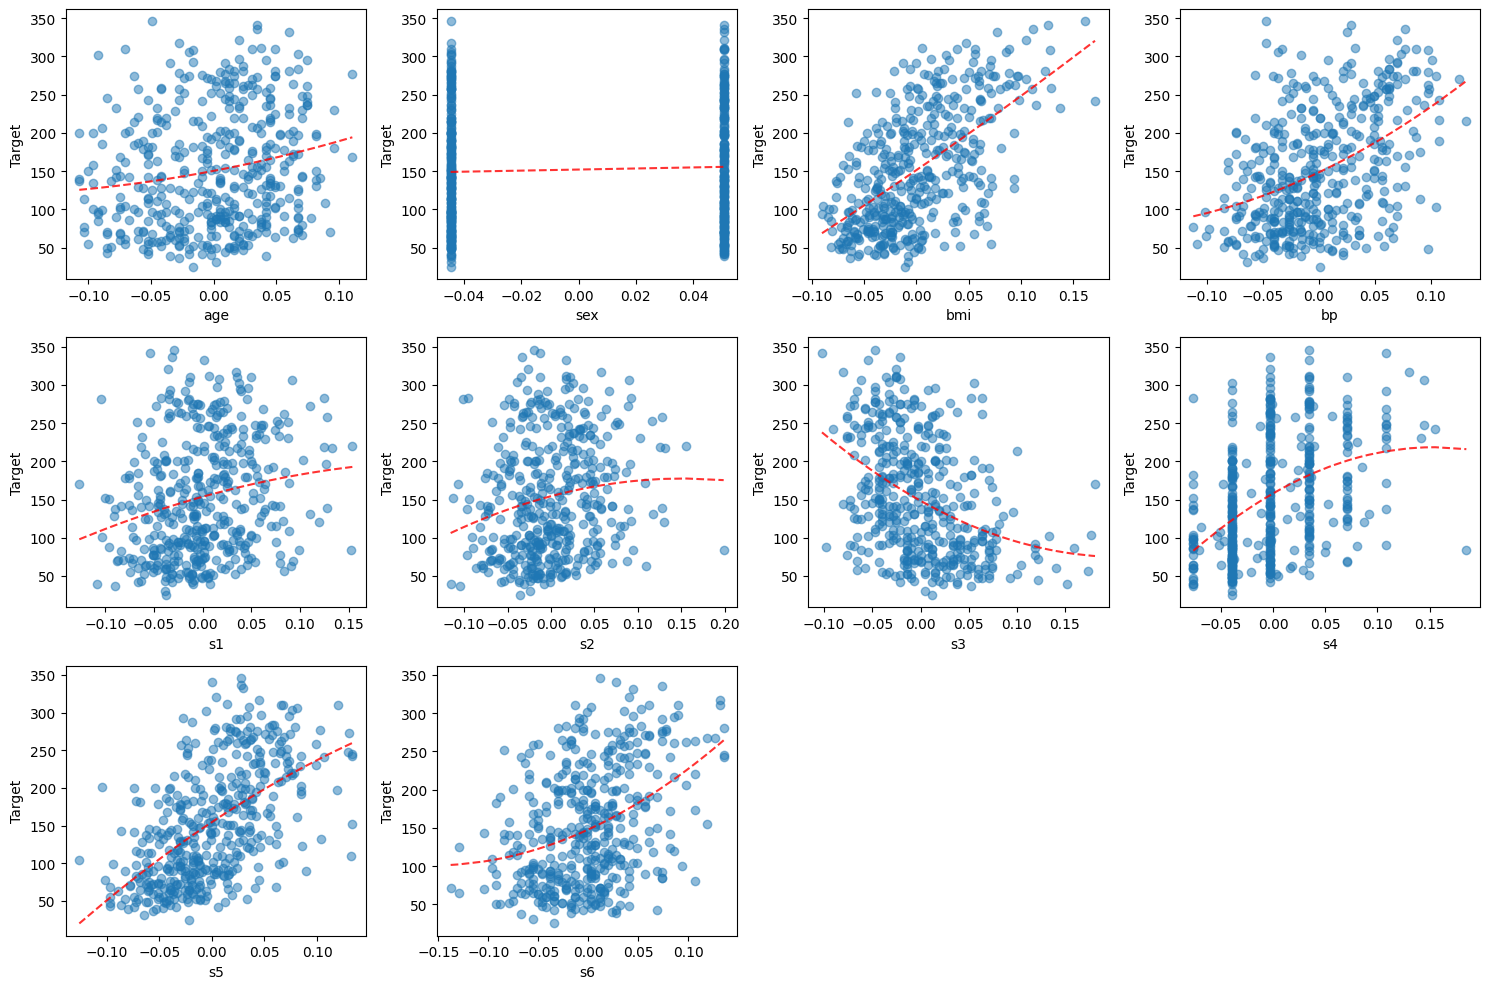

In [ ]:

# 8. Check for Non-Linear Relationships
plt.figure(figsize=(15, 10))
for i, feature in enumerate(diabetes.feature_names, 1):
    plt.subplot(3, 4, i)
    plt.scatter(X[feature], y, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Target')
    z = np.polyfit(X[feature], y, 2)
    p = np.poly1d(z)
    plt.plot(sorted(X[feature]), p(sorted(X[feature])), 'r--', alpha=0.8)
plt.tight_layout()
plt.show()

In [ ]:

# 9. Data Preprocessing
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'saved_models/scaler.joblib')



['saved_models/scaler.joblib']

In [ ]:

# Create polynomial features for polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False,interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [ ]:
# Dictionary of regression models
models = {
    'XGBoost Regression': XGBRegressor(colsample_bytree=0.9, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8, random_state=42),
    'Random Forest Regression': RandomForestRegressor(max_depth=10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 10, n_estimators= 200, random_state=42),
    'Neural Network Regression': MLPRegressor(hidden_layer_sizes=(150, 75, 50), activation='relu', solver='adam', alpha=0.001, batch_size='auto', learning_rate='adaptive', max_iter=1000, early_stopping=True, random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(learning_rate= 0.01, max_depth= 4, min_samples_leaf= 1, min_samples_split= 6, n_estimators= 200, subsample= 0.8, random_state=42),
    'Support Vector Regression (SVR)': SVR( epsilon= 0.1, gamma= 'scale', kernel= 'linear'),
    # Updated this line to pass parameters to the inner regressor and transformer correctly
    'Quantile Regression': TransformedTargetRegressor(regressor=GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8, random_state=42),  transformer=QuantileTransformer(output_distribution='normal', n_quantiles=500) ),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='auto', leaf_size=30, p=2),
    'Polynomial Regression': LinearRegression(fit_intercept=True, n_jobs=-1),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features='sqrt', random_state=42),
    'Ridge Regression': Ridge(alpha=0.5, solver='auto', fit_intercept=True, random_state=42),
    'Linear Regression': LinearRegression(fit_intercept=True, n_jobs=-1),
    'Elastic Net Regression': ElasticNet(alpha= 0.1, l1_ratio= 0.1, max_iter= 2000, random_state=42),
    'Lasso Regression': Lasso(alpha=0.001, fit_intercept=True, max_iter=2000, random_state=42),
    'Bayesian Ridge Regression': BayesianRidge( alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6, fit_intercept=True),
    'Generalized Additive Models': GaussianProcessRegressor( kernel=RBF(length_scale=0.5),  alpha=1.0,n_restarts_optimizer=2,random_state=42)
}

In [ ]:

# Dictionary to store results
results = {}

def plot_feature_importance(model, name, feature_names):
    """Plot feature importance if the model supports it"""
    plt.figure(figsize=(10, 6))

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.title(f'Feature Importances ({name})')
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.savefig(f'plots/feature_importance_{name.replace(" ", "_").lower()}.png')
        plt.close()

        # Return feature importance as dictionary
        return dict(zip(feature_names, importances))

    elif hasattr(model, 'coef_'):
        coefficients = model.coef_
        if coefficients.ndim > 1:  # For polynomial regression
            coefficients = np.mean(np.abs(coefficients), axis=0)

        plt.title(f'Feature Coefficients ({name})')
        plt.bar(range(len(coefficients)), np.abs(coefficients))
        plt.xticks(range(len(coefficients)), feature_names, rotation=45)
        plt.tight_layout()
        plt.savefig(f'plots/feature_coefficients_{name.replace(" ", "_").lower()}.png')
        plt.close()

        # Return coefficients as dictionary
        return dict(zip(feature_names, np.abs(coefficients)))

    return None




In [ ]:
# Train and evaluate models with batch processing for Gaussian Process Regressor
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Use polynomial features for polynomial regression, scaled features for others
    if name == 'Polynomial Regression':
        X_train_use = X_train_poly
        X_test_use = X_test_poly
        feature_names = [f"Poly_{i}" for i in range(X_train_poly.shape[1])]
    else:
        X_train_use = X_train_scaled
        X_test_use = X_test_scaled
        feature_names = diabetes.feature_names


    # Train other models normally
    model.fit(X_train_use, y_train)

    # Save the model
    joblib.dump(model, f'saved_models/{name.replace(" ", "_").lower()}.joblib')

    # Make predictions
    y_pred_train = model.predict(X_train_use)
    y_pred_test = model.predict(X_test_use)

    # Calculate metrics
    results[name] = {
        'Train R2': r2_score(y_train, y_pred_train),
        'Test R2': r2_score(y_test, y_pred_test),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'Train MAE': mean_absolute_error(y_train, y_pred_train),
        'Test MAE': mean_absolute_error(y_test, y_pred_test)
    }

    # Get feature importance or coefficients
    importance = plot_feature_importance(model, name, feature_names)
    if importance:
        results[name]['Feature Importance'] = importance

print("Training and evaluation completed.")



Training XGBoost Regression...

Training Random Forest Regression...

Training Neural Network Regression...

Training Gradient Boosting Regression...

Training Support Vector Regression (SVR)...

Training Quantile Regression...

Training K-Nearest Neighbors Regression...

Training Polynomial Regression...

Training Decision Tree Regression...

Training Ridge Regression...

Training Linear Regression...

Training Elastic Net Regression...

Training Lasso Regression...

Training Bayesian Ridge Regression...

Training Generalized Additive Models...
Training and evaluation completed.


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:

# Create a DataFrame with results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
results_df[['Train R2', 'Test R2', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE']].round(4).sort_values(by='Test R2', ascending=False)



Model Performance Comparison:


,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
Generalized Additive Models,0.548892,0.507128,52.35564,51.100995,42.219799,40.42361
Polynomial Regression,0.592907,0.477954,49.735916,52.591607,39.729867,41.153042
XGBoost Regression,0.769034,0.465783,37.462497,53.201156,30.853534,43.241886
Random Forest Regression,0.79256,0.465382,35.503312,53.221135,29.48058,43.301309
Elastic Net Regression,0.522073,0.46001,53.889468,53.487835,43.794451,42.94953
Bayesian Ridge Regression,0.524113,0.457935,53.774343,53.590513,43.674444,42.870397
Ridge Regression,0.527827,0.453519,53.564068,53.808376,43.487926,42.804287
Lasso Regression,0.527919,0.452638,53.558847,53.851726,43.483559,42.794066
Linear Regression,0.527919,0.452603,53.558843,53.853446,43.483504,42.794095
K-Nearest Neighbors Regression,1.0,0.448536,0.0,54.053139,0.0,42.465874


In [ ]:

# Example of making predictions on new data
def predict_house_price(model_name, new_data):
    # Load the saved model and scaler
    model = joblib.load(f'saved_models/{model_name.replace(" ", "_").lower()}.joblib')
    scaler = joblib.load('saved_models/scaler.joblib')

    # Scale the new data
    new_data_scaled = scaler.transform(new_data)

    # If using polynomial regression, transform the features
    if model_name == 'Polynomial Regression':
        new_data_scaled = poly.transform(new_data_scaled)

    # Make predictions
    predictions = model.predict(new_data_scaled)

    return predictions


# Example usage of prediction function
# Create sample new data (using the same features as the diabetes dataset)
sample_new_data = pd.DataFrame({
    'age': [0.03807591],
    'sex': [0.05068012],
    'bmi': [0.06169621],
    'bp': [0.02187235],
    's1': [-0.0442235],
    's2': [-0.03482076],
    's3': [-0.04340085],
    's4': [-0.00259226],
    's5': [0.01990842],
    's6': [-0.01764613]
}, index=[0]) # Added index to avoid future errors


# Make predictions using the best performing model
best_model = results_df.sort_values(by='Test R2', ascending=False).index[0]
prediction = predict_house_price(best_model, sample_new_data)
print(f"\nPredicted house price using {best_model}: {prediction[0]}")



Predicted house price using Generalized Additive Models: 218.71715304100175


<Figure size 1500x800 with 0 Axes>

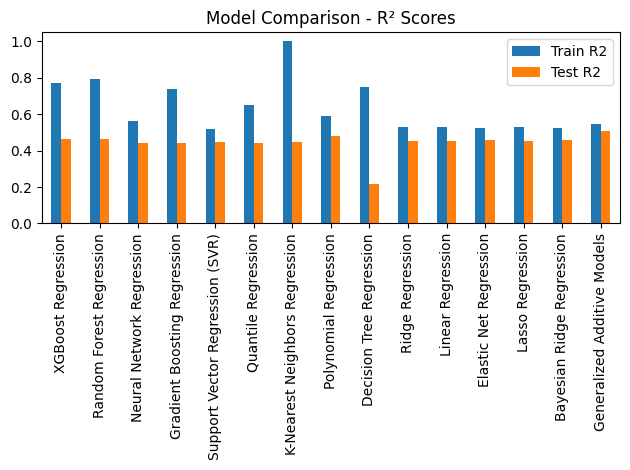

In [ ]:

# Save full results to CSV
results_df.to_csv('model_comparison_results.csv')

# Plot model comparison
plt.figure(figsize=(15, 8))
results_df[['Train R2', 'Test R2']].plot(kind='bar')
plt.title('Model Comparison - R² Scores')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()
plt.close()

In [ ]:
# Load all saved models
loaded_models = {}
for filename in os.listdir('saved_models'):
    if filename.endswith('.joblib') and filename != 'scaler.joblib':
        model_name = filename[:-7].replace("_", " ")
        loaded_models[model_name] = joblib.load(f'saved_models/{filename}')

# Make predictions with all loaded models, ensuring correct input data
predictions = {}
for name, model in loaded_models.items():
    print(f"Making predictions with {name}...")

    if 'polynomial' in name.lower():
        predictions[name] = model.predict(X_test_poly)
    else:
        predictions[name] = model.predict(X_test_scaled)

Making predictions with decision tree regression...
Making predictions with support vector regression (svr)...
Making predictions with gradient boosting regression...
Making predictions with linear regression...
Making predictions with lasso regression...
Making predictions with xgboost regression...
Making predictions with polynomial regression...
Making predictions with quantile regression...
Making predictions with k-nearest neighbors regression...
Making predictions with bayesian ridge regression...
Making predictions with random forest regression...
Making predictions with elastic net regression...
Making predictions with neural network regression...
Making predictions with ridge regression...
Making predictions with generalized additive models...


In [ ]:

# Create a DataFrame to store predictions and actual values
prediction_df = pd.DataFrame({'Actual': y_test})

# Add predictions from each model to the DataFrame
for model_name, y_pred in predictions.items():
    prediction_df[model_name] = y_pred

# Print or display the prediction DataFrame
print("\nPredictions for each model on the test set:")
prediction_df

# Optionally, you can save the predictions to a CSV file
# prediction_df.to_csv('predictions.csv', index=False)


Predictions for each model on the test set:


,Actual,decision tree regression,support vector regression (svr),gradient boosting regression,linear regression,lasso regression,xgboost regression,polynomial regression,quantile regression,k-nearest neighbors regression,bayesian ridge regression,random forest regression,elastic net regression,neural network regression,ridge regression,generalized additive models
0,219.0,187.571429,134.090152,149.452495,139.547558,139.554380,167.147568,124.318251,145.235455,151.639643,141.587134,146.709169,143.052265,158.700359,139.719955,139.501858
1,70.0,129.250000,177.118044,180.640136,179.517208,179.525280,169.671768,137.694377,162.385261,137.361017,180.014002,158.989588,178.661437,185.784796,179.773428,166.779960
2,202.0,71.000000,132.812670,154.127759,134.038756,134.068553,159.597122,152.903430,143.000000,156.895765,140.574004,152.642035,142.284848,142.048878,134.984909,141.437567
3,230.0,276.500000,286.477023,242.293596,291.417029,291.416597,272.081787,373.540132,244.095322,247.303631,291.522855,255.790069,288.483548,321.825566,291.828081,242.301872
4,111.0,148.142857,117.515005,124.519494,123.789659,123.779899,118.040329,106.255574,109.000000,139.315110,122.932183,128.201187,124.494298,89.119912,123.441879,125.467702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,153.0,84.714286,115.191903,98.161978,115.011800,114.996487,85.005653,110.583693,92.000000,120.023816,112.435248,92.211430,113.036859,86.096499,114.475429,110.391953
85,98.0,83.857143,89.887758,86.759097,78.955842,78.977342,74.998581,71.095305,74.000000,107.091873,85.805265,80.990276,87.827862,74.721563,79.912520,77.432289
86,37.0,128.666667,84.186220,93.475074,81.560873,81.555433,91.206787,88.613656,84.943024,102.016677,80.953281,95.351130,81.036444,82.894532,81.456388,94.896714
87,63.0,52.750000,66.606101,93.792290,54.379973,54.407975,81.829414,90.495053,71.000000,80.535940,62.554467,79.130765,64.866059,74.141325,55.542452,77.537104


In [31]:

def load_and_preprocess_data():
    """Load diabetes dataset and preprocess it"""
    from sklearn.datasets import load_diabetes
    diabetes = load_diabetes()
    X = diabetes.data
    y = diabetes.target

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def optimize_xgboost():
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'min_child_weight': [1, 3, 5],
        'reg_alpha': [0.01, 0.1, 1.0],
        'reg_lambda': [0.01, 0.1, 1.0]
    }
    return GridSearchCV(
        XGBRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_random_forest():
    param_grid = {
        'n_estimators': [100, 150, 200],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }
    return GridSearchCV(
        RandomForestRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_neural_network():
    param_grid = {
        'hidden_layer_sizes': [(100,), (150, 75), (150, 75, 50)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam', 'sgd'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive'],
        'max_iter': [500, 1000, 2000]
    }
    return GridSearchCV(
        MLPRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_gradient_boosting():
    param_grid = {
        'n_estimators': [100, 150, 200],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 0.9, 1.0],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 3]
    }
    return GridSearchCV(
        GradientBoostingRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_svr():
    param_grid = {
        'kernel': ['rbf', 'linear', 'poly'],
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.1, 0.01, 0.001],
        'gamma': ['scale', 'auto']
    }
    return GridSearchCV(
        SVR(),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_quantile_regression():
    param_grid = {
        'regressor__n_estimators': [100, 150, 200],
        'regressor__max_depth': [3, 4, 5],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__subsample': [0.8, 0.9, 1.0],
        'transformer__n_quantiles': [100, 500, 1000]
    }
    return GridSearchCV(
        TransformedTargetRegressor(regressor=GradientBoostingRegressor(random_state=42),
                                  transformer=QuantileTransformer(output_distribution='normal')),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_knn():
    param_grid = {
        'n_neighbors': [5, 8, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [20, 30, 40]
    }
    return GridSearchCV(
        KNeighborsRegressor(),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_polynomial_regression():
    param_grid = {
        'fit_intercept': [True, False],
        'n_jobs': [-1]
    }
    return GridSearchCV(
        LinearRegression(),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_decision_tree():
    param_grid = {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    return GridSearchCV(
        DecisionTreeRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_ridge():
    param_grid = {
        'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'],
        'fit_intercept': [True, False],
        'random_state': [42]
    }
    return GridSearchCV(
        Ridge(),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_linear_regression():
    param_grid = {
        'fit_intercept': [True, False],
        'n_jobs': [-1]
    }
    return GridSearchCV(
        LinearRegression(),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_elastic_net():
    param_grid = {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'max_iter': [2000]
    }
    return GridSearchCV(
        ElasticNet(random_state=42),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_lasso():
    param_grid = {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
        'fit_intercept': [True, False],
        'max_iter': [2000],
        'random_state': [42]
    }
    return GridSearchCV(
        Lasso(),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_bayesian_ridge():
    param_grid = {
        'alpha_1': [1e-6, 1e-4, 1e-2],
        'alpha_2': [1e-6, 1e-4, 1e-2],
        'lambda_1': [1e-6, 1e-4, 1e-2],
        'lambda_2': [1e-6, 1e-4, 1e-2],
        'fit_intercept': [True, False]
    }
    return GridSearchCV(
        BayesianRidge(),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def optimize_gam():
    param_grid = {
        'kernel': [RBF(length_scale=0.5), RBF(length_scale=1.0), RBF(length_scale=2.0)],
        'alpha': [0.1, 1.0, 10.0],
        'n_restarts_optimizer': [1, 2, 3],
        'random_state': [42]
    }
    return GridSearchCV(
        GaussianProcessRegressor(),
        param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

def train_and_evaluate_models():
    # Load and preprocess data
    X_train, X_test, y_train, y_test = load_and_preprocess_data()

    # Dictionary to store results
    results = {}

    # Optimize and evaluate each model
    for name, optimize_func in [
        ('XGBoost Regression', optimize_xgboost),
        ('Random Forest Regression', optimize_random_forest),
        ('Neural Network Regression', optimize_neural_network),
        ('Gradient Boosting Regression', optimize_gradient_boosting),
        ('Support Vector Regression (SVR)', optimize_svr),
        ('Quantile Regression', optimize_quantile_regression),
        ('K-Nearest Neighbors Regression', optimize_knn),
        ('Polynomial Regression', optimize_polynomial_regression),
        ('Decision Tree Regression', optimize_decision_tree),
        ('Ridge Regression', optimize_ridge),
        ('Linear Regression', optimize_linear_regression),
        ('Elastic Net Regression', optimize_elastic_net),
        ('Lasso Regression', optimize_lasso),
        ('Bayesian Ridge Regression', optimize_bayesian_ridge),
        ('Generalized Additive Models', optimize_gam)
    ]:
        print(f"\nOptimizing {name}...")
        model = optimize_func()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = {
            'R2 Score': r2_score(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'Best Parameters': model.best_params_,
            'Best Score (CV)': model.best_score_
        }

        print(f"Best parameters for {name}:")
        print(model.best_params_)
        print(f"R2 Score: {results[name]['R2 Score']:.4f}")
        print(f"RMSE: {results[name]['RMSE']:.4f}")

    return results

# Run the optimization
if __name__ == "__main__":
    results = train_and_evaluate_models()


Optimizing XGBoost Regression...
Best parameters for XGBoost Regression:
{'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0.01, 'reg_lambda': 0.1, 'subsample': 0.8}
R2 Score: 0.4658
RMSE: 53.2012

Optimizing Random Forest Regression...
Best parameters for Random Forest Regression:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
R2 Score: 0.4665
RMSE: 53.1652

Optimizing Neural Network Regression...
Best parameters for Neural Network Regression:
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (150, 75), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
R2 Score: 0.4800
RMSE: 52.4884

Optimizing Gradient Boosting Regression...
Best parameters for Gradient Boosting Regression:
{'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200, 'subsample': 0.8}
R2 Score: 0.4430
RMSE: 54.3